In [243]:
import numpy as np

In [244]:
l = [1,2,3,4]
n = np.arange(4)

In [245]:
print(type(l))
print(type(n))

<class 'list'>
<class 'numpy.ndarray'>


In [246]:
l.append('a')

In [247]:
print(l)

[1, 2, 3, 4, 'a']


In [248]:
n.dtype

dtype('int32')

In [249]:
np.concatenate([n,np.array(['a'])])

array(['0', '1', '2', '3', 'a'], dtype='<U11')

PIL

In [250]:
#Install PIL
#https://pillow.readthedocs.io/en/stable/reference/Image.html
# !pip install Pillow

In [251]:
from PIL import Image
import numpy as np

img = Image.open('cat.jpg')
print(type(img))
print(img)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x1D03483F550>


In [252]:
# !wget https://raw.githubusercontent.com/chaklam-silpasuwanchai/Python-for-Data-Science/master/Lectures/02-Data%20Science/figures/cat.jpg
!ls -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


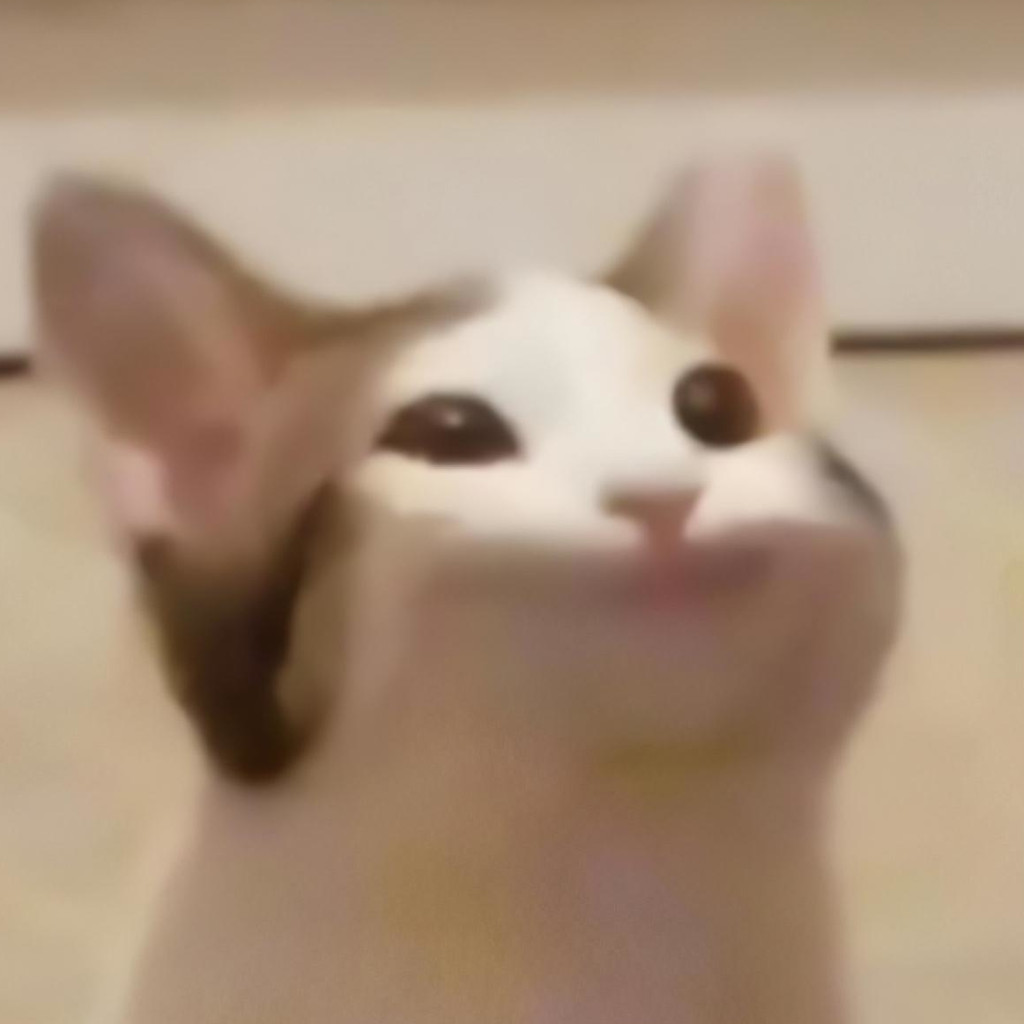

In [253]:
# img.show()
img

In [254]:
img_array = np.array(img)
print(f"{img_array.shape=}")
#width,height,dimension R:0 G:1 B:2 

img_array.shape=(1024, 1024, 3)


In [255]:
img_array_only_red = img_array.copy()
# print(img_array_only_red[:,:,1:3])
img_array_only_red[:,:,1:3] = 0
Image.fromarray(img_array_only_red).show()

In [256]:
Image.fromarray(img_array).show()

## Task 1
I want you to copy the image so that we only see the cat eyes

*Hint : use slicing

In [257]:
cat_eyes = img_array.copy()
cat_eyes = cat_eyes[350:500,350:800,:]

Image.fromarray(cat_eyes).show()

## Task 2 
I want you to draw the red box over the eye area\
8 bit or 0 - 255

In [258]:
img_array_red_box = img_array.copy()
img_array_red_box[350:500,350:800,1:3] = 0 #0 is black 255 White
img_array_red_box[350:500,350:800,0] = 255
Image.fromarray(img_array_red_box).show()

## Task 4
Draw a black frame ove the eye area

In [259]:
frame = np.ones((5,5))
print(frame)
print()
area = np.arange(0,25,1).reshape(5,5)
# print(frame)
frame[1:-1] = 0
# frame[:,0] = 1
# frame[:,-1] = 1
print(area)
print(frame * area)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0.  1.  2.  3.  4.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [20. 21. 22. 23. 24.]]


In [260]:
img_array_black_frame = img_array.copy()

select_area = img_array_black_frame[350:500,350:800,:] #select eye area 
print(select_area.shape)
# frame = np.zeros((150,450,3))
frame = np.zeros(select_area.shape)
frame[10:-10,10:-10,:] = 1
img_array_black_frame[350:500,350:800] = select_area * frame

Image.fromarray(img_array_black_frame).show()

(150, 450, 3)


## Task 5
Take a break 10 minutes

16:42

## Task 6
Rotate the image 90 degrees conuter clockwise

In [261]:
#Hint 1: Transpose
a = np.arange(0,2*3*4).reshape(2,3,4,1)
print(a.shape,a.T.shape)
#a.T
#Hint 2: np.swapaxes
np.swapaxes(a, 1, 3).shape

(2, 3, 4, 1) (1, 4, 3, 2)


(2, 1, 4, 3)

In [269]:
img_array_rotate_90 = img_array.copy()
img_array_rotate_90 = img_array_rotate_90.swapaxes(0,1)
print(img_array_rotate_90.shape)
Image.fromarray(img_array_rotate_90).show()

(1024, 1024, 3)


## Task 6.5
np.flip()

In [263]:
img_array_flip = img_array.copy()
img_array_flip = img_array_flip.swapaxes(0,1)
img_array_flip = np.flip(img_array_flip.copy(),0)
print(img_array_flip.shape)
Image.fromarray(img_array_flip).show()

(1024, 1024, 3)


## Task 7
Rotate to 180 and Rotate to 270 counter clockwise

In [264]:
img_array_rotate_180 = img_array.copy()
img_array_rotate_180 = np.flip(img_array_rotate_180,0)
Image.fromarray(img_array_rotate_180).show()

img_array_rotate_270 = img_array.copy()
img_array_rotate_270 = np.flip(img_array_rotate_270,0)
img_array_rotate_270 = img_array_rotate_270.swapaxes(0,1)
Image.fromarray(img_array_rotate_270).show()

## Task 8
Make a GIF out of the rotate images

Series of images => list of images

4 frames

images = [original, 90 degree, 180 degree, 270 degree]

images[0].save('./car.gif',save_all=True, append_images[1:], optimize = False, duration = 500 , loop = 0)

In [265]:
Image.fromarray(img_array_only_red).save('./cat_in_red.jpg')

In [266]:
original = Image.fromarray(img_array)
d90 = Image.fromarray(img_array_rotate_90)
d180 = Image.fromarray(img_array_rotate_180)
d270 = Image.fromarray(img_array_rotate_270)
images = [original, d90, d180, d270]

images[0].save('./cat.gif', save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)


## Task9

is to build 4d array such that is 'n_samples' = > number of_samples

Hint : numpy.concatenate and numpy.expand_dims

In [271]:
import sklearn 
img_array.shape, img_array_only_red.shape

#data.shape => (n.sample, 1024, 1024, 3)

#(n_samples, height, width, channels)

((1024, 1024, 3), (1024, 1024, 3))

In [296]:
a = np.arange(0,50)
b = np.arange(10,20)
# a.shape,b.shape
#dataset.shape => (2,10)
# np.concatenate([a,b]).shape
# a, => 1,10
# print(a)
print(a)
a.reshape(1,-1)

a = np.expand_dims(a, axis=0)
print(a.shape)
a = np.expand_dims(a, axis=2)
print(a.shape)
a = np.expand_dims(a, axis=0)
print(a.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
(1, 50)
(1, 50, 1)
(1, 1, 50, 1)


In [298]:
a = np.expand_dims(img_array, axis=0)
b = np.expand_dims(img_array_only_red, axis=0)
c = np.expand_dims(img_array_only_red, axis=0)
d = np.expand_dims(img_array_only_red, axis=0)
print(a.shape,b.shape,c.shape,d.shape)

images = []
images.append(np.expand_dims(img_array, axis=0))
images.append(np.expand_dims(img_array_only_red, axis=0))
images.append(np.expand_dims(img_array_only_red, axis=0))
images.append(np.expand_dims(img_array_only_red, axis=0))
dataset = np.concatenate(images,axis=0)
print(dataset.shape)

(1, 1024, 1024, 3) (1, 1024, 1024, 3)
(4, 1024, 1024, 3)


In [300]:
np.vstack(images).shape

(4, 1024, 1024, 3)